# Mushroom Classification Project

## Preliminaries

### Notes

Here's the link to the dataset: https://www.kaggle.com/uciml/mushroom-classification
- Mushroom toxicity links:https://www.thenakedscientists.com/articles/interviews/why-are-mushrooms-poisonous
    -  There's a huge number of mushroom toxins that all act in very, very different ways that aren't even related to each other.
- https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/
    - some rules: "Avoid mushrooms with white gills, a skirt or ring on the stem and a bulbous or sack like base called a volva" and "Avoid mushrooms with red on the cap or stem"
- The two types of mushrooms that are included in this dataset
    - Agaricus: https://en.wikipedia.org/wiki/Agaricus
    - Lepoita: https://en.wikipedia.org/wiki/Lepiota

### Imports

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.api as sms
import xgboost as xgb
from xgboost import plot_importance
import pickle
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
df = pd.read_csv("mushrooms.csv")

### Removing unwanted columns
This is done to make the project slightly more challenging and more intuitive to a layman using this model

In [8]:
unwanted_columns = ['spore-print-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring','stalk-shape', 
                    'stalk-root', "gill-size", 'odor',"gill-attachment"] 
df.drop(columns = unwanted_columns, inplace=True)

## EDA

### class imbalance for target variable?

In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'gill-spacing', 'gill-color', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'population', 'habitat'],
      dtype='object')

In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

### What values are in each column?

In [12]:
col_unique_dict = {}
for item in df.columns:
    col_unique_dict[item] = list(df[item].unique())

In [13]:
col_unique_dict

{'class': ['p', 'e'],
 'cap-shape': ['x', 'b', 's', 'f', 'k', 'c'],
 'cap-surface': ['s', 'y', 'f', 'g'],
 'cap-color': ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'],
 'bruises': ['t', 'f'],
 'gill-spacing': ['c', 'w'],
 'gill-color': ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
 'stalk-color-above-ring': ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'],
 'stalk-color-below-ring': ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'],
 'veil-type': ['p'],
 'veil-color': ['w', 'n', 'o', 'y'],
 'ring-number': ['o', 't', 'n'],
 'ring-type': ['p', 'e', 'l', 'f', 'n'],
 'population': ['s', 'n', 'a', 'v', 'y', 'c'],
 'habitat': ['u', 'g', 'm', 'd', 'p', 'w', 'l']}

In [14]:
df['veil-type'].nunique()

1

### Dropping veil_type

In [15]:
df.drop(columns = ['veil-type'], inplace = True)

In [16]:
df.shape

(8124, 14)

### Broad categories of columns

- The broad categories of columns are:
    - spore
    - cap 
    - stalk
    - gills 
    - veil 
    - ring

### Checking how many nans there are in the dataset

In [17]:
nan_count_list = []
for item in df.columns:
    nan_count = df[item].isnull().sum()
    nan_count_list.append(f"{item} has {nan_count} nan values")

In [18]:
nan_count_list

['class has 0 nan values',
 'cap-shape has 0 nan values',
 'cap-surface has 0 nan values',
 'cap-color has 0 nan values',
 'bruises has 0 nan values',
 'gill-spacing has 0 nan values',
 'gill-color has 0 nan values',
 'stalk-color-above-ring has 0 nan values',
 'stalk-color-below-ring has 0 nan values',
 'veil-color has 0 nan values',
 'ring-number has 0 nan values',
 'ring-type has 0 nan values',
 'population has 0 nan values',
 'habitat has 0 nan values']

### Datatypes and describing data

In [19]:
df.dtypes

class                     object
cap-shape                 object
cap-surface               object
cap-color                 object
bruises                   object
gill-spacing              object
gill-color                object
stalk-color-above-ring    object
stalk-color-below-ring    object
veil-color                object
ring-number               object
ring-type                 object
population                object
habitat                   object
dtype: object

In [20]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-color,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,2,12,9,9,4,3,5,6,7
top,e,x,y,n,f,c,b,w,w,w,o,p,v,d
freq,4208,3656,3244,2284,4748,6812,1728,4464,4384,7924,7488,3968,4040,3148


### Examining Features

#### Visualize the features

##### Stacked bar charts

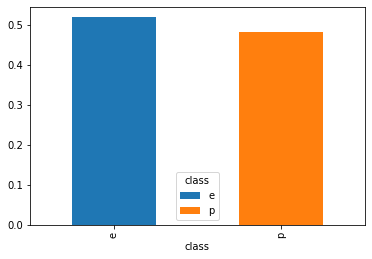

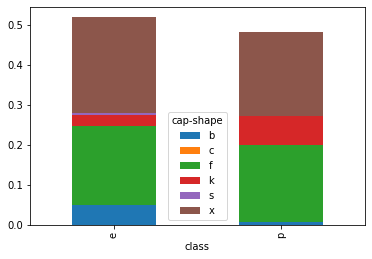

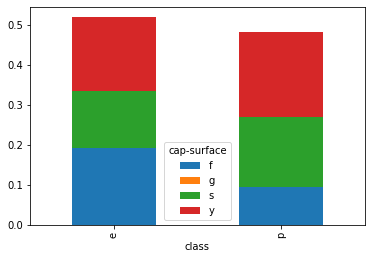

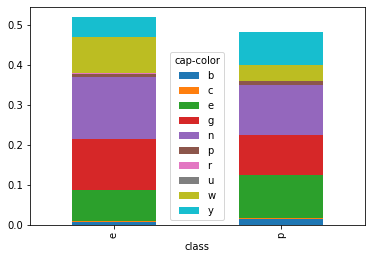

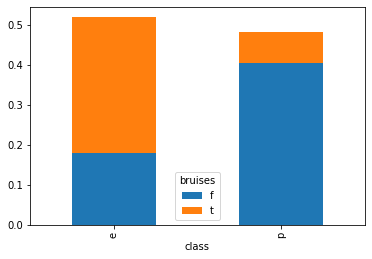

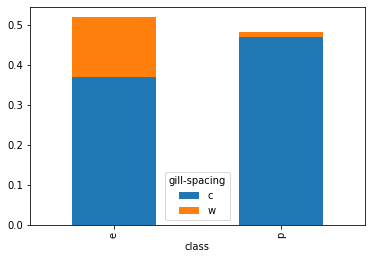

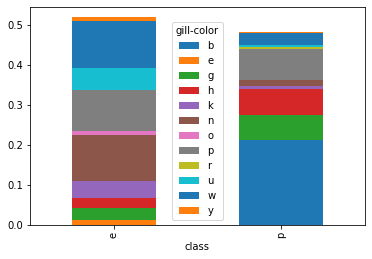

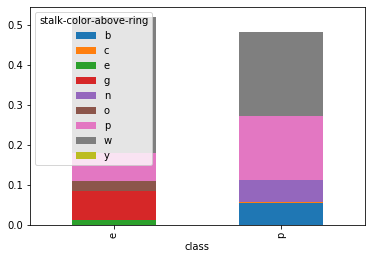

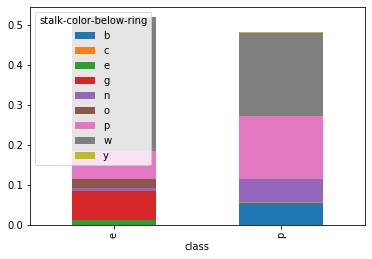

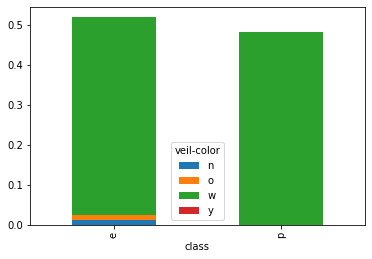

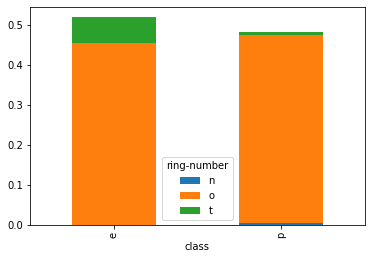

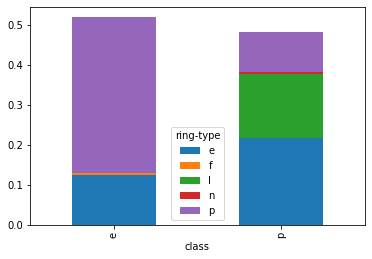

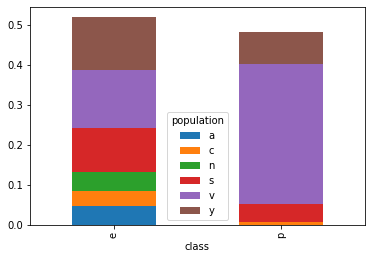

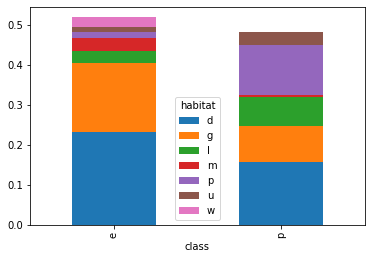

In [108]:
for item in df.columns:
    pd.crosstab(index = df['class'], columns = df[item], normalize = True).plot(kind='bar', stacked=True)
    plt.show()

#### Using Chi-Squared Test

###### Making contingency table

In [35]:
#doing this on the training set
y_dum_train.values
all_X_dum_cols = list(X_dum_train.columns)

In [36]:
def get_chi_values(y_dum_train = y_dum_train, X_dum_train = X_dum_train):
    probability = 0.95
    all_column_chi = {}
    for item in X_dum_train.columns:
        cont_table = pd.crosstab(index = y_dum_train, columns = X_dum_train[item])
        stat, p, dof, expected = chi2_contingency(cont_table)
        alpha = 1.0 - probability
        if p <= alpha:
            all_column_chi[item] = [f"probability = {round(p, 3)}", 'Dependent (reject H0)']
        else:
            all_column_chi[item] = [f"probability = {round(p, 3)}", 'Independent (fail to reject H0)']
    return all_column_chi
        

In [37]:
all_column_chi = get_chi_values()

In [38]:
independent_cols = [key for key, values in all_column_chi.items() if values[1] == 'Independent (fail to reject H0)']
dependent_cols = [key for key, values in all_column_chi.items() if values[1] == 'Dependent (reject H0)']

In [39]:
# dependent_cols

In [40]:
independent_cols

['cap-shape_c', 'cap-shape_f', 'cap-surface_g']

#### Viewing some features in a lmplot

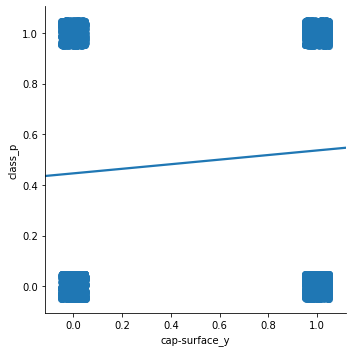

In [41]:
# categorical feature plot
sns.lmplot(x='cap-surface_y', y='class_p', data=dummy_df, ci=None, logistic=True,  x_jitter=0.05, y_jitter=0.05)
#stalk_root has nans i dont think it affects anything though

## Model Selection

### Train / Test / Split 

#### Split with dummies for each

In [29]:
dummy_df = pd.get_dummies(data=df, drop_first = True)

In [31]:
X_dum = dummy_df.drop('class_p', axis = 1)
y_dum = dummy_df['class_p']

In [34]:
X_dum_train, X_dum_test, y_dum_train, y_dum_test = train_test_split(X_dum, y_dum, random_state=1)

Since almost all of the columns are clearly correlated with the target variable, they will all help predict the target variable

### Logistic Regression

#### Viewing ROC plot for the best features 

In [86]:
def only_best_features(dummy_df = dummy_df):
    X_dum = dummy_df.drop('class_p', axis = 1)
    y_dum = dummy_df['class_p']
    X_dum_train, X_dum_test, y_dum_train, y_dum_test = train_test_split(X_dum, y_dum, random_state=1)
    logreg = LogisticRegression(max_iter=100, random_state = 5, verbose = 0, penalty='l1', solver = 'saga')
    for i in range(0, len(X_dum_train.columns)):
        column = X_dum_train.columns[i]
        logreg.fit(X_dum_train[[column]], y_dum_train)
        dum_predict_log = logreg.predict(X_dum_test[[column]])
        fpr, tpr, thresholds = metrics.roc_curve(y_dum_test, dum_predict_log)
        plt.plot(fpr, tpr, label= f"{column}")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve for Mushrooms Classification')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)

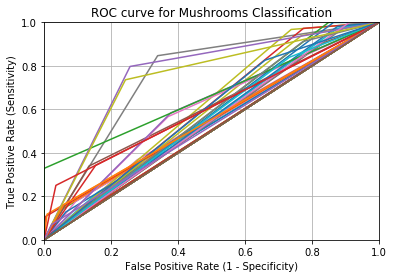

In [87]:
only_best_features()

#### Viewing ROC plot for the all features 

In [88]:
#use l2 penalty b/c that works better when there arent any outliers
logreg = LogisticRegression(C=1e9, max_iter=50, random_state = 5, penalty='l1')
logreg.fit(X_dum_train, y_dum_train)
# log_reg_results = logreg.predict(X_dum_test)

/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gregfeliu/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=50, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
dum_predict_log = logreg.predict(X_dum_test)

In [90]:
cm = metrics.confusion_matrix(y_dum_test, dum_predict_log)
print(cm)

[[999  21]
 [ 15 996]]


In [91]:
print(metrics.recall_score(y_dum_test, dum_predict_log))

0.9851632047477745


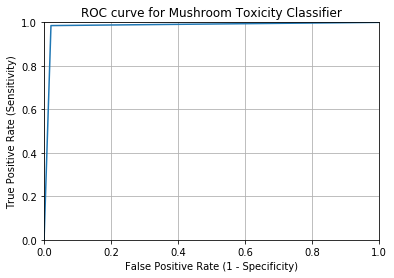

In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_dum_test, dum_predict_log)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Mushroom Toxicity Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### XGBoost

#### GridSearch1

In [49]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:
# starting with wide parameter distribution
xgb_classifier = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': list(range(0, 500, 50)),
              'learning_rate': [0.01, 0.11, 0.21, 0.31, 0.41, 0.51],
              'max_depth': [3],
              'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'min_child_weight': [1]
             }

In [93]:
#initiate the Gridsearch model
gsearch1 = GridSearchCV(
    estimator = xgb_classifier,
    param_grid = param_dist, 
    scoring='recall',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)

In [94]:
# how do I use this with categorical variables? Should I use my dum training set?
### If i have to make them into numbers, I should use their position in the alphabet to assign them
#https://stackoverflow.com/questions/34265102/xgboost-categorical-variables-dummification-vs-encoding
gsearch1.fit(X_dum_train,y_dum_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 31.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9, 1],
                         'learning

In [95]:
gsearch1.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.51,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200}

In [96]:
gsearch1.best_score_

0.9972377585794383

#### GridSearch2

- The best parameters from the first gridsearch
    - {'colsample_bytree': 0.4,
 'learning_rate': 0.51,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200}

In [50]:
# narrower parameter distribution
xgb_classifier2 = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist2 = {'n_estimators': [175, 200, 225],
              'learning_rate': [0.49, 0.51, 0.53],
              'max_depth': [3],
              'colsample_bytree': [0.35, 0.4, 0.45],
              'min_child_weight': [1]
             }

In [51]:
gsearch2 = GridSearchCV(
    estimator = xgb_classifier2,
    param_grid = param_dist2, 
    scoring='recall',
    n_jobs=-1,
    verbose=1,
    iid=True, 
    cv=5)

In [52]:
xgb_model = gsearch2.fit(X_dum_train,y_dum_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.1min finished


In [54]:
gsearch2.best_params_

{'colsample_bytree': 0.35,
 'learning_rate': 0.49,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 175}

In [55]:
gsearch2.best_score_

0.9927706888608101

In [56]:
xg_clf_final = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.4, 
                           learning_rate = 0.51,
                           max_depth = 4, 
                           n_estimators = 200)

In [57]:
xg_clf_final.fit(X_dum_train,y_dum_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0,
              learning_rate=0.51, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
# print(xg_clf_final.feature_importances_)

In [59]:
xg_clf_final_predictions = xg_clf_final.predict(X_dum_test)
xg_clf_final_precision = precision_score(y_dum_test, xg_clf_final_predictions)
xg_clf_final_recall = recall_score(y_dum_test, xg_clf_final_predictions)
xg_clf_final_recall

0.9970326409495549

In [65]:
xgb_cm = metrics.confusion_matrix(y_dum_test, xg_clf_final_predictions)
print(xgb_cm)

[[1013    7]
 [   3 1008]]


##### Plotting Feature Importance

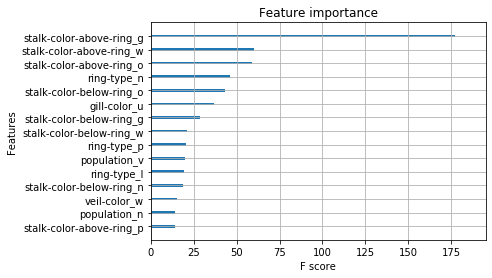

In [107]:
plot_importance(xg_clf_final, max_num_features=15, importance_type = 'gain', show_values=False)
plt.savefig("XGBoost_feature_importance.png", optimize = True, pad_inches = 0.2, bbox_inches = 'tight')

In [94]:
col_importances = xg_clf_final.get_booster().get_score(importance_type = 'gain')

In [95]:
sorted_columns = sorted(col_importances.items(), key=lambda x: x[1], reverse=True)

In [96]:
sorted_columns[0:10]

[('stalk-color-above-ring_g', 177.16729857500002),
 ('stalk-color-above-ring_w', 59.908161794729985),
 ('stalk-color-above-ring_o', 59.065714568249994),
 ('ring-type_n', 46.18153),
 ('stalk-color-below-ring_o', 43.3846436),
 ('gill-color_u', 36.62340006666667),
 ('stalk-color-below-ring_g', 28.764271089999998),
 ('stalk-color-below-ring_w', 20.856082244492008),
 ('ring-type_p', 20.384612814946905),
 ('population_v', 19.821951300538604)]

### Random Forest Classifier

In [99]:
rf = RandomForestClassifier(n_estimators = 10000, random_state = 42)
rf.fit(X_dum_train, y_dum_train)
rf_pred = rf.predict(X_dum_test)

In [100]:
recall_score(y_dum_test, rf_pred)

0.9970326409495549

In [101]:
random_forest_cm = metrics.confusion_matrix(y_dum_test, rf_pred)
print(random_forest_cm)

[[1013    7]
 [   3 1008]]


## Saving Final Models

In [102]:
model_pickle = open("best_mushroom_model_xg_parameters", 'wb')
pickle.dump(gsearch2.best_estimator_, model_pickle)
model_pickle.close()

In [103]:
with open('logistic_regression.pickle', 'wb') as f:
    pickle.dump(dum_predict_log, f)

In [104]:
with open('best_xg_boost_model.pickle', 'wb') as f:
    pickle.dump(xg_clf_final, f)

In [105]:
with open('random_forest_model.pickle', 'wb') as f:
    pickle.dump(rf, f)